# Contribution to the fuel tax reform by category

# Import general modules

In [1]:
from __future__ import division

import pandas
import seaborn
from pandas import concat

# Import modules specific to OpenFisca

In [2]:
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_line_percent, graph_builder_bar
from openfisca_france_indirect_taxation.surveys import SurveyScenario
from openfisca_france_indirect_taxation.almost_ideal_demand_system.aids_estimation_from_stata import get_elasticities
from openfisca_france_indirect_taxation.examples.calage_bdf_cn_energy import get_inflators_by_year_energy

# Import new colors

In [3]:
seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Simulate contribution to fuel tax reform by categories

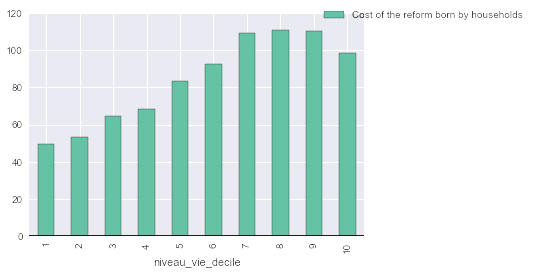

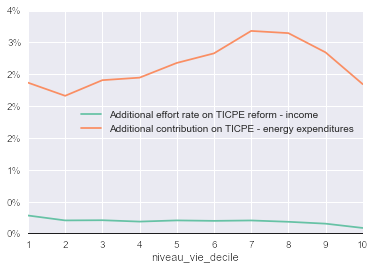

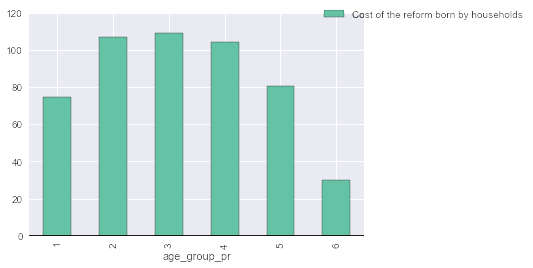

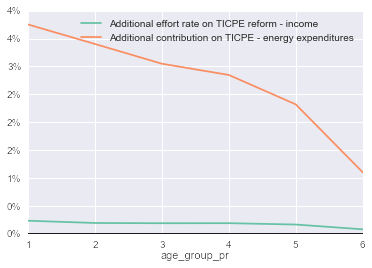

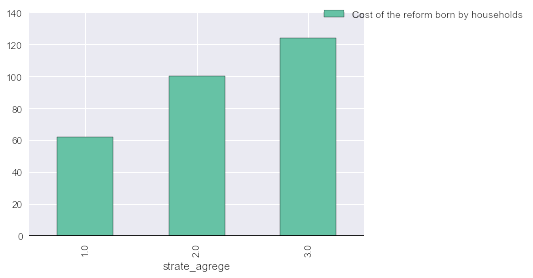

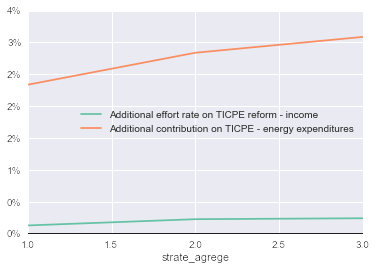

In [4]:
# Sélection des variables utilisées pour la simulation

inflators_by_year = get_inflators_by_year_energy(rebuild = False)
year = 2014
data_year = 2011
elasticities = get_elasticities(data_year)
inflation_kwargs = dict(inflator_by_variable = inflators_by_year[year])
del inflation_kwargs['inflator_by_variable']['somme_coicop12']

simulated_variables = ['difference_ticpe_totale_taxes_carburants', 'depenses_energies', 'rev_disp_loyerimput']

survey_scenario = SurveyScenario.create(
    elasticities = elasticities,
    inflation_kwargs = inflation_kwargs,
    reform_key = 'taxes_carburants',
    year = year,
    data_year = data_year
    )

for category in ['niveau_vie_decile', 'age_group_pr', 'strate_agrege']:
    pivot_table = pandas.DataFrame()
    for values in simulated_variables:
        pivot_table = pandas.concat([
            pivot_table,
            survey_scenario.compute_pivot_table(values = [values], columns = ['{}'.format(category)])
            ])
    df = pivot_table.T
    df['Additional contribution on TICPE - energy expenditures'] = \
        df['difference_ticpe_totale_taxes_carburants'] / df['depenses_energies']
    df['Additional effort rate on TICPE reform - income'] = \
        df['difference_ticpe_totale_taxes_carburants'] / df['rev_disp_loyerimput']
    df.rename(columns = {'difference_ticpe_totale_taxes_carburants': 'Cost of the reform born by households'},
        inplace = True)

    # Réalisation de graphiques
    graph_builder_bar(df['Cost of the reform born by households'])
    graph_builder_line_percent(
        df[['Additional contribution on TICPE - energy expenditures', 'Additional effort rate on TICPE reform - income']]
        )


# Simulate contribution to carbon tax reform by categories

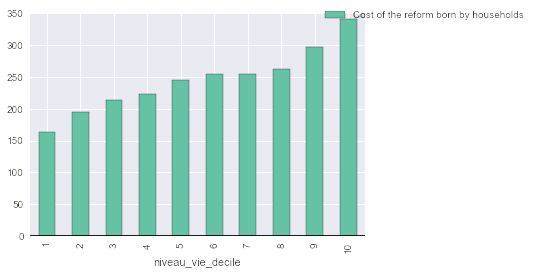

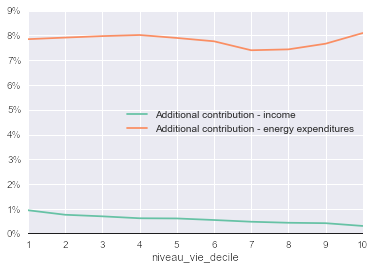

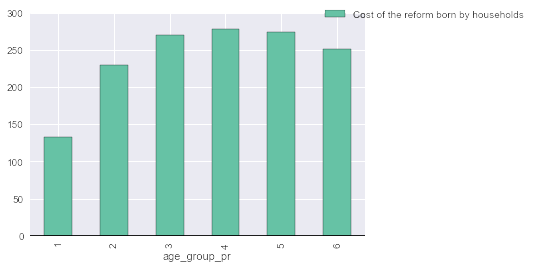

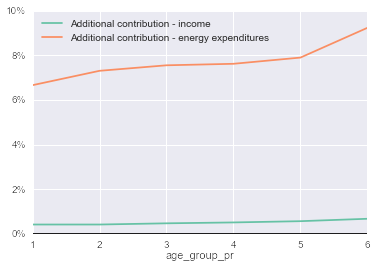

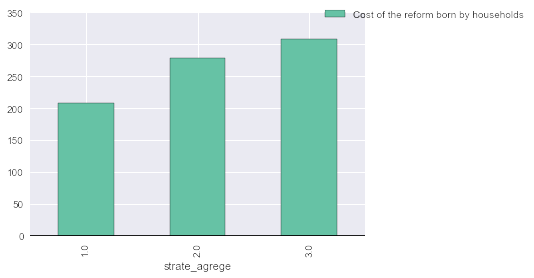

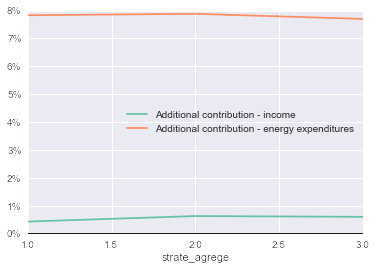

In [5]:
# Sélection des variables utilisées pour la simulation

inflators_by_year = get_inflators_by_year_energy(rebuild = False)
year = 2014
data_year = 2011
elasticities = get_elasticities(data_year)
inflation_kwargs = dict(inflator_by_variable = inflators_by_year[year])
del inflation_kwargs['inflator_by_variable']['somme_coicop12']

simulated_variables = ['difference_contribution_energie_taxe_carbone', 'depenses_energies', 'rev_disp_loyerimput']

survey_scenario = SurveyScenario.create(
    elasticities = elasticities,
    inflation_kwargs = inflation_kwargs,
    reform_key = 'taxe_carbone',
    year = year,
    data_year = data_year
    )

for category in ['niveau_vie_decile', 'age_group_pr', 'strate_agrege']:
    pivot_table = pandas.DataFrame()
    for values in simulated_variables:
        pivot_table = pandas.concat([
            pivot_table,
            survey_scenario.compute_pivot_table(values = [values], columns = ['{}'.format(category)])
            ])
    df = pivot_table.T
    df['Additional contribution - energy expenditures'] = \
        df['difference_contribution_energie_taxe_carbone'] / df['depenses_energies']
    df['Additional contribution - income'] = \
        df['difference_contribution_energie_taxe_carbone'] / df['rev_disp_loyerimput']
    df.rename(columns = {'difference_contribution_energie_taxe_carbone': 'Cost of the reform born by households'},
        inplace = True)

    # Réalisation de graphiques
    graph_builder_bar(df['Cost of the reform born by households'])
    graph_builder_line_percent(
        df[['Additional contribution - income', 'Additional contribution - energy expenditures']]
        )


# Simulate contribution to the 2014-2015 increase in "contribution climat énergie" by categories

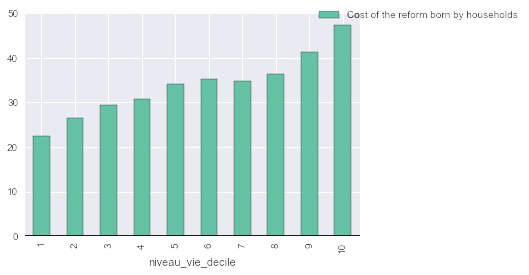

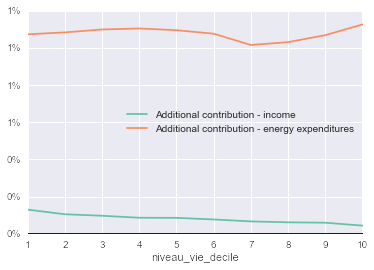

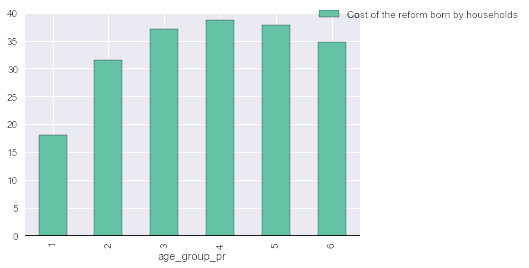

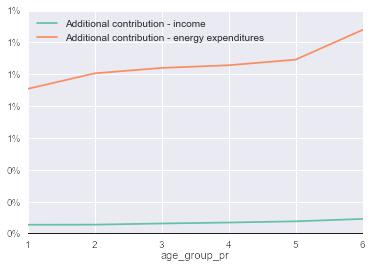

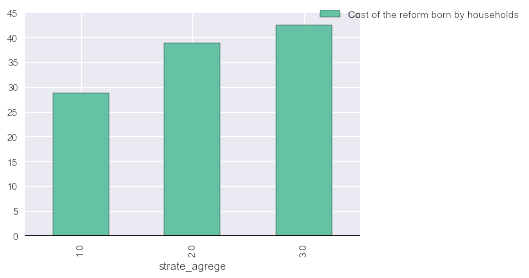

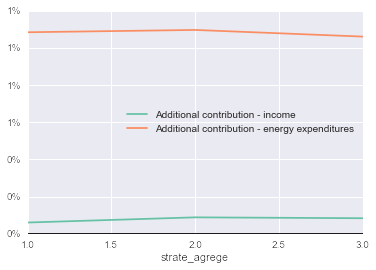

In [6]:
# Sélection des variables utilisées pour la simulation

inflators_by_year = get_inflators_by_year_energy(rebuild = False)
year = 2014
data_year = 2011
elasticities = get_elasticities(data_year)
inflation_kwargs = dict(inflator_by_variable = inflators_by_year[year])
del inflation_kwargs['inflator_by_variable']['somme_coicop12']

simulated_variables = ['difference_contribution_energie_cce_2014_2015', 'depenses_energies', 'rev_disp_loyerimput']

survey_scenario = SurveyScenario.create(
    elasticities = elasticities,
    inflation_kwargs = inflation_kwargs,
    reform_key = 'contribution_climat_energie_reforme',
    year = year,
    data_year = data_year
    )

for category in ['niveau_vie_decile', 'age_group_pr', 'strate_agrege']:
    pivot_table = pandas.DataFrame()
    for values in simulated_variables:
        pivot_table = pandas.concat([
            pivot_table,
            survey_scenario.compute_pivot_table(values = [values], columns = ['{}'.format(category)])
            ])
    df = pivot_table.T
    df['Additional contribution - energy expenditures'] = \
        df['difference_contribution_energie_cce_2014_2015'] / df['depenses_energies']
    df['Additional contribution - income'] = \
        df['difference_contribution_energie_cce_2014_2015'] / df['rev_disp_loyerimput']
    df.rename(columns = {'difference_contribution_energie_cce_2014_2015': 'Cost of the reform born by households'},
        inplace = True)

    # Réalisation de graphiques
    graph_builder_bar(df['Cost of the reform born by households'])
    graph_builder_line_percent(
        df[['Additional contribution - income', 'Additional contribution - energy expenditures']]
        )

# Simulate contribution to the 2014-2016 increase in "contribution climat énergie" by categories

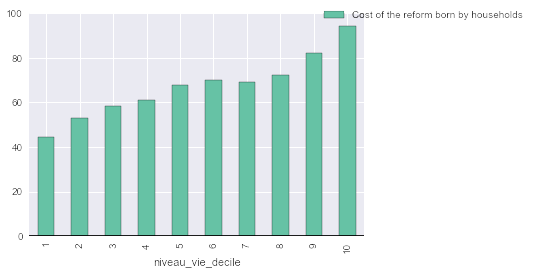

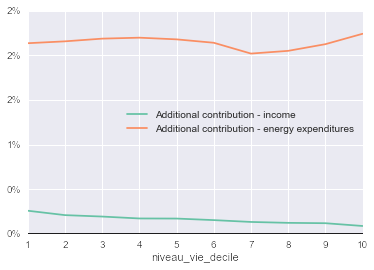

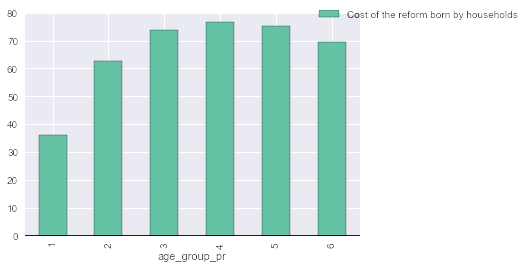

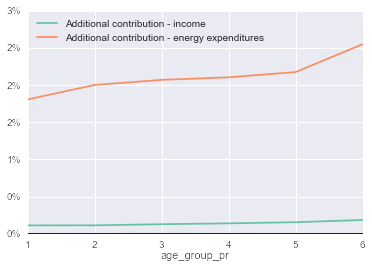

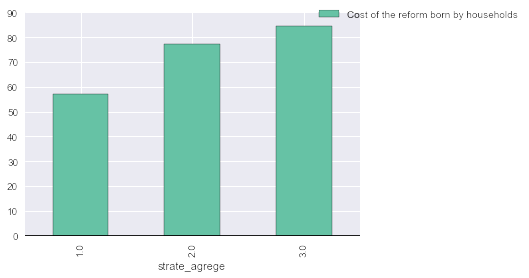

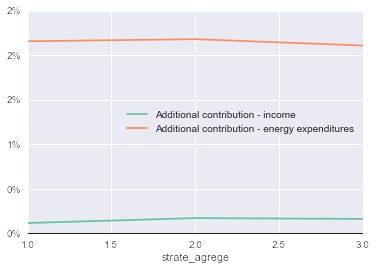

In [7]:
# Sélection des variables utilisées pour la simulation

inflators_by_year = get_inflators_by_year_energy(rebuild = False)
year = 2014
data_year = 2011
elasticities = get_elasticities(data_year)
inflation_kwargs = dict(inflator_by_variable = inflators_by_year[year])
del inflation_kwargs['inflator_by_variable']['somme_coicop12']

simulated_variables = ['difference_contribution_energie_cce_2014_2016', 'depenses_energies', 'rev_disp_loyerimput']

survey_scenario = SurveyScenario.create(
    elasticities = elasticities,
    inflation_kwargs = inflation_kwargs,
    reform_key = 'contribution_climat_energie_reforme',
    year = year,
    data_year = data_year
    )

for category in ['niveau_vie_decile', 'age_group_pr', 'strate_agrege']:
    pivot_table = pandas.DataFrame()
    for values in simulated_variables:
        pivot_table = pandas.concat([
            pivot_table,
            survey_scenario.compute_pivot_table(values = [values], columns = ['{}'.format(category)])
            ])
    df = pivot_table.T
    df['Additional contribution - energy expenditures'] = \
        df['difference_contribution_energie_cce_2014_2016'] / df['depenses_energies']
    df['Additional contribution - income'] = \
        df['difference_contribution_energie_cce_2014_2016'] / df['rev_disp_loyerimput']
    df.rename(columns = {'difference_contribution_energie_cce_2014_2016': 'Cost of the reform born by households'},
        inplace = True)

    # Réalisation de graphiques
    graph_builder_bar(df['Cost of the reform born by households'])
    graph_builder_line_percent(
        df[['Additional contribution - income', 'Additional contribution - energy expenditures']]
        )